In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from lydia_image_similarity.database import NumpyVectorDatabase
from lydia_image_similarity.embedder import ResNet50Embedder

### init

In [2]:
db = NumpyVectorDatabase(vector_size=2048)
db.load("../data/database.npz")

In [3]:
embedder = ResNet50Embedder()

In [4]:
def load_from_index(index: int) -> Image.Image:
    image_filepath = db.metadata[np.where(db.ids == index)[0][0]]["filepath"]
    image = Image.open("../" + image_filepath)
    return image

def print_image(image: Image, title: str = "") -> None:
    plt.figure()
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

### test

In [5]:
db.ids[:10]

array([461828, 165352, 224667, 602094, 347895, 153932, 163796, 272697,
       762871, 232500])

#### test 1

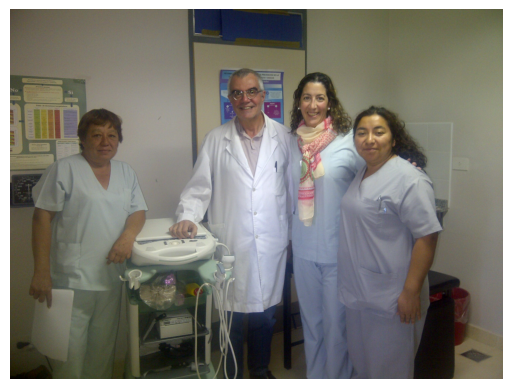

In [6]:
image = load_from_index(461828)
print_image(image)

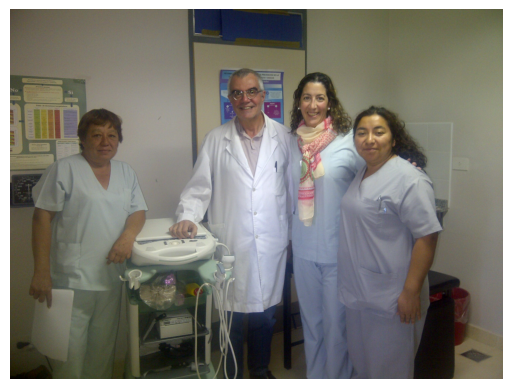

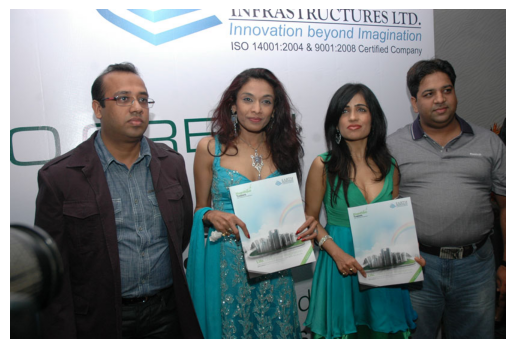

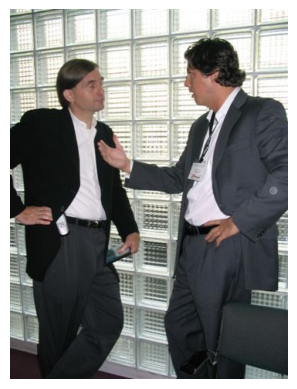

In [7]:
similar_images = db.top_k_similarities(embedder.embed(image), 3)

for image_index in similar_images:
    print_image(load_from_index(image_index))